In [41]:
from spice.models import IcosphereModel
from transformer_payne import Blackbody
from spice.spectrum import simulate_observed_flux
import jax.numpy as jnp
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

bb = Blackbody()
model = IcosphereModel.construct(10000, 1., 1., [5777.], bb.parameter_names)
vws = jnp.linspace(1., 30000., 100000)
observed_flux = simulate_observed_flux(bb.intensity, model, jnp.log10(vws))

/Users/mjablons/Documents/stellar-mesh-integration/src/spice/models/mesh_model.py:233: UserWarning: If override_log_g is True, either parameter_names must include one of [logg,loggs,log_g,log_gs,log g,log gs,surface gravity,surface gravities,surface_gravity,surface_gravities], or log_g_index must be passed for log g to be used in the spectrum emulator.
  warnings.warn(f"If override_log_g is True, either parameter_names must include one of [" + ",".join(


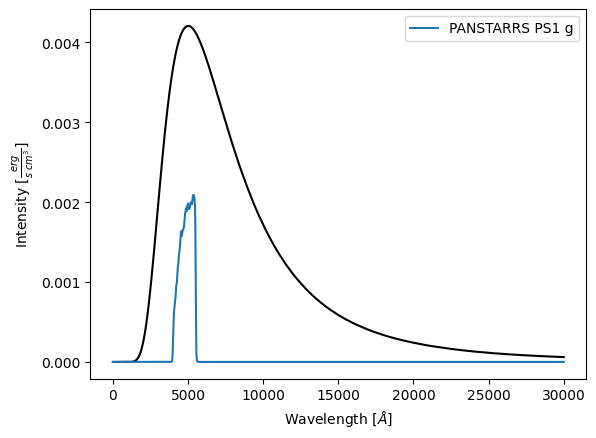

In [42]:
from spice.spectrum.filter import PANSTARRS_PS1_g

panstarrs_g = PANSTARRS_PS1_g()
panstarrs_g.plot_filter_responses_for_wavelengths(vws, observed_flux[:, 0])
plt.show()


In [44]:
from spice.spectrum.spectrum import AB_passband_luminosity, ST_passband_luminosity

AB_passband_luminosity(panstarrs_g, vws, observed_flux[:, 0]), ST_passband_luminosity(panstarrs_g, vws, observed_flux[:, 0])

(Array(3.5544128, dtype=float32), Array(4.862295, dtype=float32))

In [52]:
from jax.scipy.integrate import trapezoid

transmission_responses = panstarrs_g.filter_responses_for_wavelengths(vws)

psg1 = -2.5 * jnp.log10(
        trapezoid(x=vws, y=observed_flux[:, 0] * transmission_responses) /
        (trapezoid(x=vws, y=transmission_responses / ((vws * 1e-8)**2)))
    ) + panstarrs_g.AB_zeropoint
psg1

Array(5.1418247, dtype=float32)

In [48]:
panstarrs_g.AB_zeropoint

-22.40788262039795